In [1]:
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df1 = pd.read_csv('cleaned_dataset_team1.csv')
df1.head(10)

,Unnamed: 0.1,Unnamed: 0,inst_type,detained_sentenced,sentence_len,current_custody_start,current_crime,age,date_first_adult_incarc,zipcode,...,Elementary_School_Expelled,Middle_School_Expelled,High_School_Expelled,Elementary_School_Suspended_Where,Middle_School_Suspended_Where,High_School_Suspended_Where,Suspended_Reason,Schools_Attended,School_Experience,Survey_Reaction
0,0,0,County Jail,Detained,Not Answered,2020-09-30,awaiting trial for probation violation,38,26,2127.0,...,no,no,yes,Not Answered,Not Answered,out-of-school,fighting girls and being mean,"St. Margarets elementary and middle, Monsignor...","No, I was a straight A student until my dad di...",With more drug programs for us to sign up for ...
1,1,1,County Jail,Sentenced,2 9 months run concurrent,2020-07-21,Both are possession of Class A + B,22,18,3064.0,...,no,no,yes,Not Answered,"in-school, out-of-school","in-school, out-of-school","talking back, skipping, food fight, smoking, w...",Amherst NH elementary (forget the name) 2 elem...,I was a phenomenal student that had so much po...,Thank you guys very much for doing this. I thi...
2,2,2,County Jail,Detained,Not Answered,2020-05-02,"4th OUI, OUI bodily injury",33,23 1/2,2130.0,...,no,no,no,Not Answered,Not Answered,Not Answered,N/A (Good luck with school),"Lafayette Elementary School, Everett, MA; Marg...","I never went to high school, I got my GED",Thank you. Happy Holidays.
3,3,3,State Prison,Detained,Not Answered,2020-07-21,"Domestic, reckless endangerment, intimidation ...",34,34,2188.0,...,no,no,no,Not Answered,Not Answered,"in-school, out-of-school","I skipped class a bunch of times, I beat up an...","William Seach School, Abigail Adams School, We...",Not Answered,Not Answered
4,4,4,County Jail,Sentenced,2 years,2019-11-15,indecent A&B,28,27,2150.0,...,no,no,yes,Not Answered,Not Answered,out-of-school,skipping school,"Chelsea Public School K-12, and Youthbuild jus...",Youthbuild was the best thing that ever happen...,"Invest in Youhtbuild Programs, they change lives"
5,5,5,County Jail,Detained,Not Answered,2017-07-19,1st degree murder,28,25 years old,1902.0,...,no,no,no,Not Answered,"in-school, out-of-school",Not Answered,"fighting, talking back, skip class, and gettin...","Witchcraft Elementary, E.J. Harrington element...",No,You're welcome
6,6,6,County Jail,Detained,Not Answered,2020-03-05,"firearm, kidnapping, suffocation, assault w/ i...",34,2 years ago,2532.0,...,no,no,no,Not Answered,Not Answered,in-school,"behavior, piercing belly buttons, skipping cla...","Falmouth Elementary, Peebles Middle School, Up...",Not Answered,"For question 28, the respondent wrote ""Yes, no..."
7,7,7,County Jail,Detained,Not Answered,2020-09-26,probation violation,31,19,3063.0,...,no,no,no,Not Answered,Not Answered,Not Answered,Not Answered,"Broad St. Pennichuck Elm, Nashua North",I enjoyed school.,I hope this helps our future child generation.
8,8,8,County Jail,Detained,Not Answered,2020-09-30,"assault, possession of class A, theft of a mot...",30,2017,2359.0,...,no,no,no,Not Answered,Not Answered,"in-school, out-of-school",fighting,"Hobomock Elementary School, Silver Lake Junior...",Not Answered,Not Answered
9,9,9,County Jail,Detained,Not Answered,2020-09-07,a firearm,18,this is my first incarceration,2130.0,...,no,no,yes,Not Answered,out-of-school,out-of-school,fights,Evertt Ewards\nTrinity Middle School\nEMK (Hig...,No,The system says it's made to help people when ...


In [47]:
df = df1[['arrested_under18', 'juvenile_diversion', 'Juvenile_Probation', 'School_Continue', 'race_ethnicity', 'gender']]

In [48]:
df.head(10)

,arrested_under18,juvenile_diversion,Juvenile_Probation,School_Continue,race_ethnicity,gender
0,Yes,No,No,No,White,Female
1,No,No,No,No,White,Female
2,Yes,No,Yes,No,Latinx,Female
3,Yes,No,No,Not Answered,White,Female
4,No,No,No,No,"Black/African American,White,Latinx",Male
5,No,No,No,No,Latinx,Female
6,No,No,No,No,White,Female
7,Yes,No,No,No,White,Female
8,No,No,No,Not Answered,White,Female
9,Yes,Yes - from a judge,Yes,Yes,Black/African American,Female


In [49]:
df.isnull().sum()

arrested_under18      0
juvenile_diversion    0
Juvenile_Probation    0
School_Continue       0
race_ethnicity        9
gender                9
dtype: int64

In [50]:
df['race_ethnicity'].fillna(df['race_ethnicity'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)


/var/folders/rw/0zpvsnj11g55n8cjmpp5sbqm0000gn/T/ipykernel_10456/1831266146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race_ethnicity'].fillna(df['race_ethnicity'].mode()[0], inplace=True)
/var/folders/rw/0zpvsnj11g55n8cjmpp5sbqm0000gn/T/ipykernel_10456/1831266146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].fillna(df['gender'].mode()[0], inplace=True)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 662.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 476.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 61, cost: 476.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, 

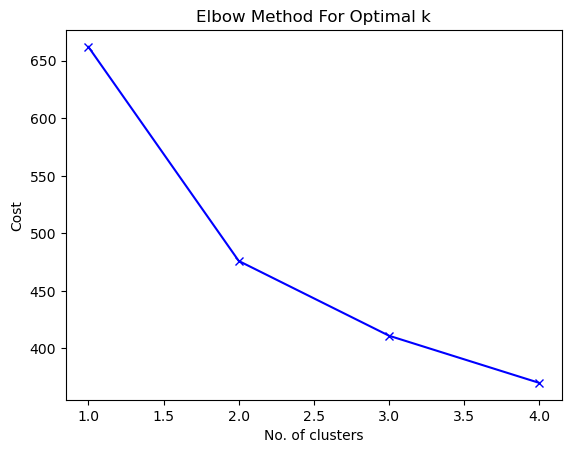

In [51]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 67, cost: 429.0
Run 1, iteration: 2/100, moves: 6, cost: 429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 57, cost: 421.0
Run 2, iteration: 2/100, moves: 34, cost: 421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 24, cost: 447.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 83, cost: 432.0
Run 4, iteration: 2/100, moves: 6, cost: 432.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 30, cost: 445.0
Best run was number 2
[0 0 2 0 0 0 0 0 0 2 0 2 2 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 2 0 0 1 0 0 0 2 0 0 2 2 0 1 0 0 0 2 2 2 0 2 0 2 2 2 0 0 0 0 0 0 1 2 0 0 0
 2 0 0 2 0 0 0 0 0 0 0 0 2 2 1 0 0 2 2 2 0 2 0

In [53]:
print(type(clusters))
print(clusters.shape)

<class 'numpy.ndarray'>
(265,)


In [54]:
print(kmode.cluster_centroids_)

[['No' 'No' 'No' 'No' 'White' 'Male']
 ['Not Answered' 'Not Answered' 'Not Answered' 'Not Answered' 'White'
  'Male']
 ['Yes' 'No' 'Yes' 'Yes' 'Black/African American' 'Male']]


In [55]:
df.insert(0, "Cluster", clusters, True)
df.head(10)

,Cluster,arrested_under18,juvenile_diversion,Juvenile_Probation,School_Continue,race_ethnicity,gender
0,0,Yes,No,No,No,White,Female
1,0,No,No,No,No,White,Female
2,2,Yes,No,Yes,No,Latinx,Female
3,0,Yes,No,No,Not Answered,White,Female
4,0,No,No,No,No,"Black/African American,White,Latinx",Male
5,0,No,No,No,No,Latinx,Female
6,0,No,No,No,No,White,Female
7,0,Yes,No,No,No,White,Female
8,0,No,No,No,Not Answered,White,Female
9,2,Yes,Yes - from a judge,Yes,Yes,Black/African American,Female


In [56]:
df['race_ethnicity'].value_counts()

White                                                               114
Black/African American                                               53
Latinx                                                               38
Prefer to self describe                                              18
Multi-Race                                                            6
Asian                                                                 4
Multi-Race,Prefer to self describe                                    3
Black/African American,Native American                                3
Native American                                                       3
Black/African American,Latinx                                         2
White,Multi-Race,Latinx                                               2
Black/African American,White,Multi-Race                               2
Multi-Race,Latinx                                                     2
Black/African American,White                                    

In [57]:
df['Cluster'].value_counts()

0    157
2     87
1     21
Name: Cluster, dtype: int64

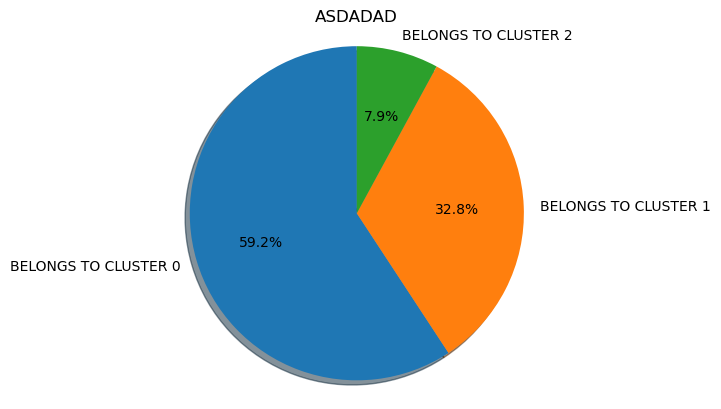

In [62]:
from itertools import count
yes_days = 0
yes_weeks = 0
no = 0
# for i in range(len(df['Cluster'])):
#     if df['Cluster'][i] == '0' :
#         no += 1
#     elif df['Cluster'][i] == '1':
#         yes_days += 1
#     elif df['Cluster'][i] == '2':
#         yes_weeks += 1
x_axis = [157,87,21]
labels = ['BELONGS TO CLUSTER 0','BELONGS TO CLUSTER 1' ,'BELONGS TO CLUSTER 2']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('ASDADAD')
plt.axis('equal')
plt.show()

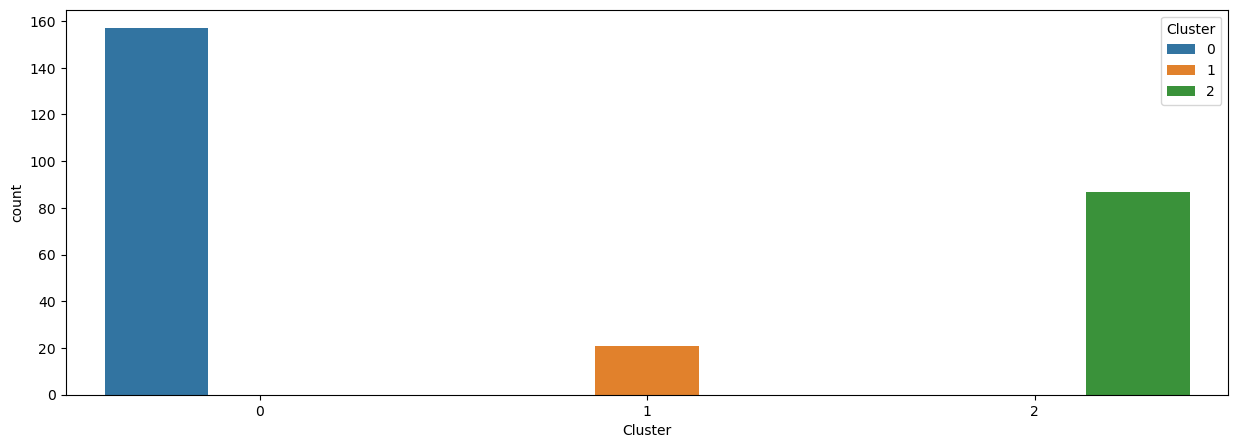

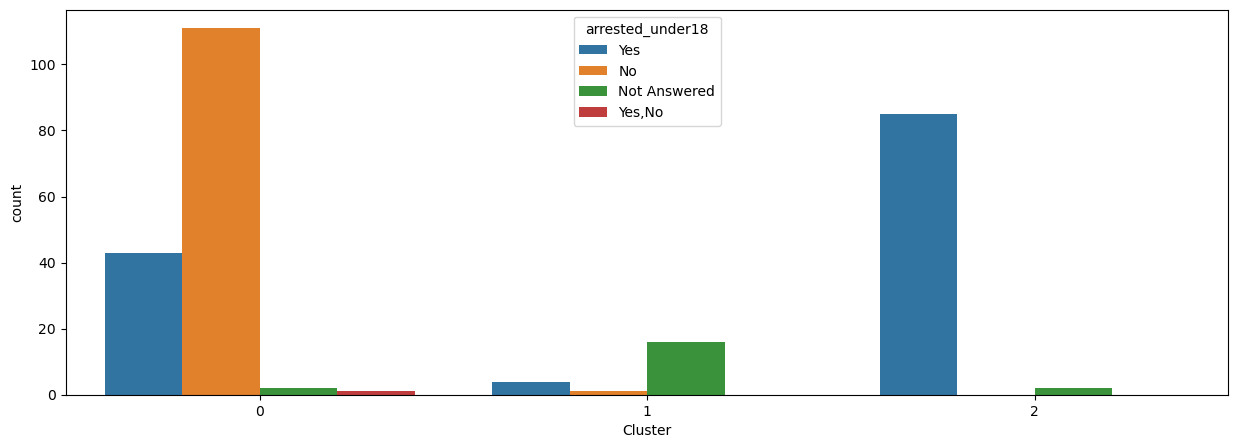

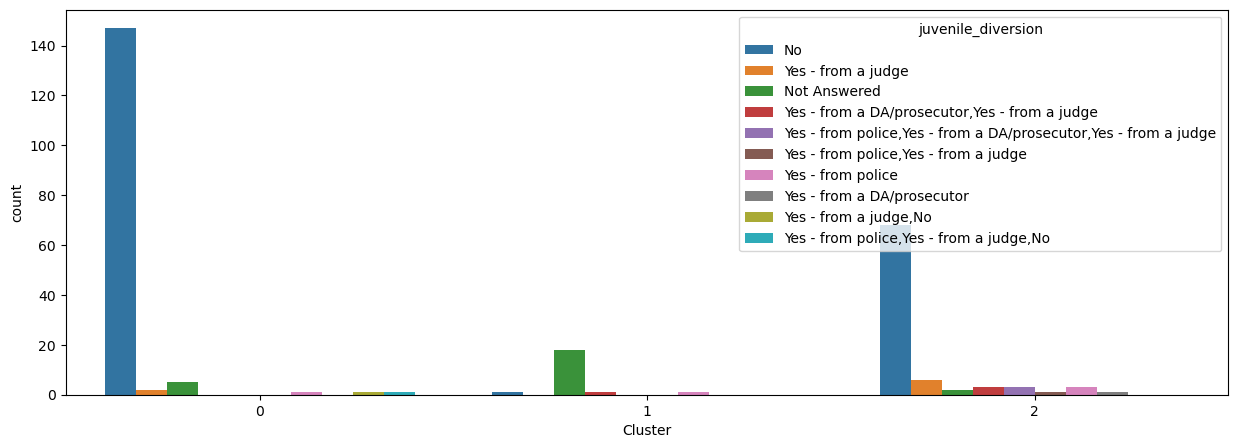

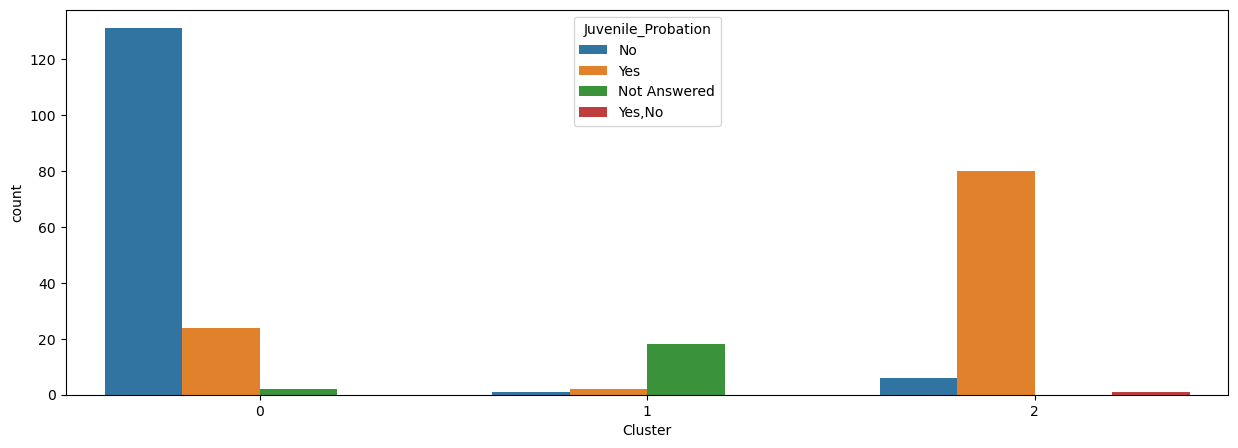

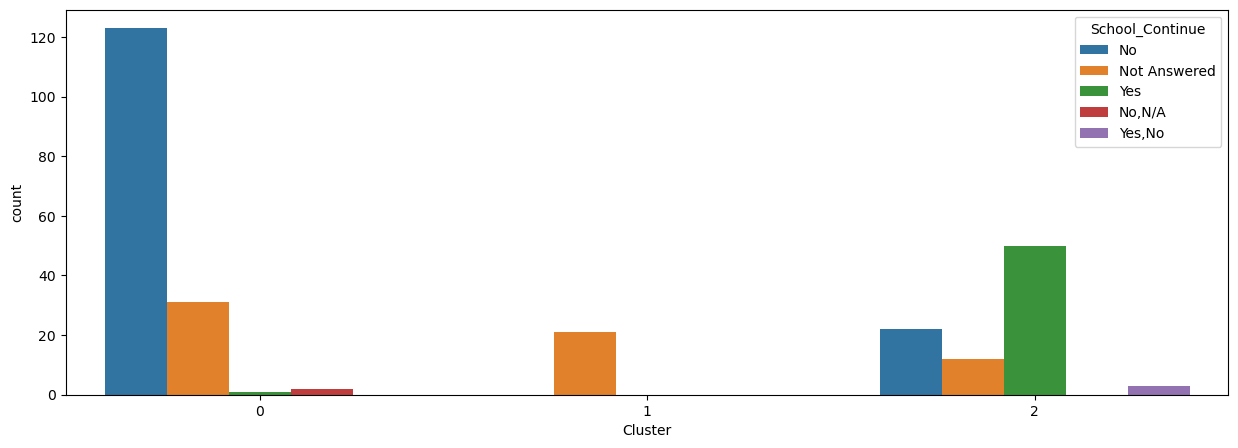

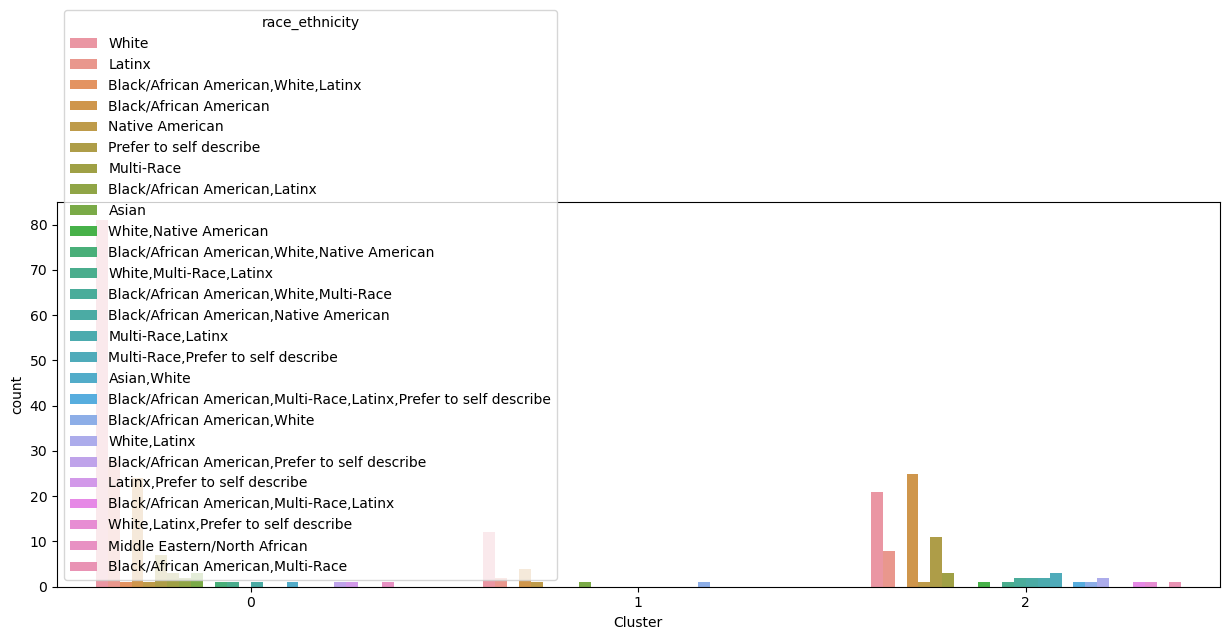

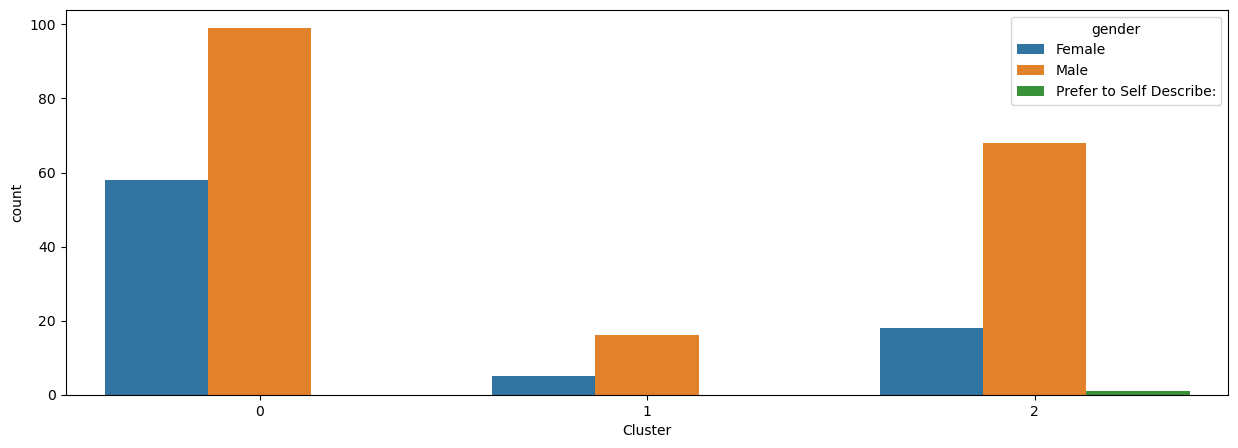

In [87]:
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
#fig = plt.figure()
for col in df:
    plt.subplots(figsize = (15,5))
    X = sns.countplot(x='Cluster',hue=col, data = df)
    plt.show()
    scatter_fig = X.get_figure()
#     fig.savefig("out.png")
    #X.savefig("sns-heatmap.png")
    scatter_fig.savefig('scatterplot.pdf')
    
    
    
    
    
    
    
    
def save_image(filename):
    
    # PdfPages is a wrapper around pdf 
    # file so there is no clash and create
    # files with no error.
    p = PdfPages(filename)
      
    # get_fignums Return list of existing 
    # figure numbers
    fig_nums = plt.get_fignums()  
    figs = [plt.figure(n) for n in fig_nums]
      
    # iterating over the numbers in list
    for fig in figs: 
        
        # and saving the files
        fig.savefig(p, format='pdf') 
      
    # close the object
    p.close()  
  # name your Pdf file
filename = "multi_plot_image.pdf"  
  
# call the function
save_image(filename)      

In [91]:
df[df['Cluster'] == 0].head()

,Cluster,arrested_under18,juvenile_diversion,Juvenile_Probation,School_Continue,race_ethnicity,gender
0,0,Yes,No,No,No,White,Female
1,0,No,No,No,No,White,Female
3,0,Yes,No,No,Not Answered,White,Female
4,0,No,No,No,No,"Black/African American,White,Latinx",Male
5,0,No,No,No,No,Latinx,Female


In [92]:
df[df['Cluster'] == 1].head()

,Cluster,arrested_under18,juvenile_diversion,Juvenile_Probation,School_Continue,race_ethnicity,gender
40,1,Not Answered,Not Answered,Not Answered,Not Answered,White,Male
50,1,No,Not Answered,Not Answered,Not Answered,Asian,Male
69,1,Yes,Not Answered,Not Answered,Not Answered,Latinx,Male
88,1,Yes,"Yes - from a DA/prosecutor,Yes - from a judge",Yes,Not Answered,White,Male
102,1,Not Answered,Not Answered,Not Answered,Not Answered,White,Male


In [93]:
df[df['Cluster'] == 2].head()

,Cluster,arrested_under18,juvenile_diversion,Juvenile_Probation,School_Continue,race_ethnicity,gender
2,2,Yes,No,Yes,No,Latinx,Female
9,2,Yes,Yes - from a judge,Yes,Yes,Black/African American,Female
11,2,Yes,No,Yes,No,Native American,Female
12,2,Yes,No,Yes,Yes,White,Female
14,2,Yes,No,Yes,Not Answered,Prefer to self describe,Male


In [44]:
df.size

3445